2024-12-03 23:07:37.478546: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 23:07:37.989495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733288858.148483   23198 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733288858.192987   23198 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 23:07:38.620995: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Processing JNJ...
          date  sentiment
0   2024-11-27     0.0000
1   2024-11-21     0.4404
2   2024-11-07    -0.5574
3   2024-12-02     0.0000
4   2024-11-16     0.0258
5   2024-11-26     0.0000
6   2024-11-13     0.6369
7   2024-11-19     0.0000
8   2024-12-02     0.5859
9   2024-11-30     0.0000
10  2024-11-20     0.5574
11  2024-11-18    -0.6597
12  2024-11-18    -0.5994
13  2024-11-29     0.0000
14  2024-11-30     0.2960
15  2024-11-25     0.4995
16  2024-11-13     0.2960
17  2024-11-16     0.0000
18  2024-11-21     0.0000
19  2024-11-21     0.2960
20  2024-11-21     0.0000
21  2024-11-09     0.0000
22  2024-11-04     0.3818
23  2024-11-08     0.4767
24  2024-11-21     0.0000
25  2024-11-20     0.0000
26  2024-11-05     0.0772
27  2024-12-02     0.0000


/tmp/ipykernel_23198/75918730.py:106: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sentiment'].fillna(0, inplace=True)
/tmp/ipykernel_23198/75918730.py:106: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentiment'].fillna(0, inplace=True)
2024-12-03 23:07:45.016506: E external/local_xla/xla/stream_exec

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.0247 - mae: 0.1246 - val_loss: 0.0628 - val_mae: 0.2506
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0165 - mae: 0.0961 - val_loss: 0.0412 - val_mae: 0.2030
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0114 - mae: 0.0836 - val_loss: 0.0215 - val_mae: 0.1468
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0108 - mae: 0.0947 - val_loss: 0.0136 - val_mae: 0.1166
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0125 - mae: 0.1046 - val_loss: 0.0147 - val_mae: 0.1213
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0116 - mae: 0.1005 - val_loss: 0.0197 - val_mae: 0.1402
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0100 - mae: 0.0916 - val_loss: 0.0260 - val_mae: 0.1613
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0093 - mae: 0.0823 - val_loss: 0.0318 - val_mae: 0.1784
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0093 

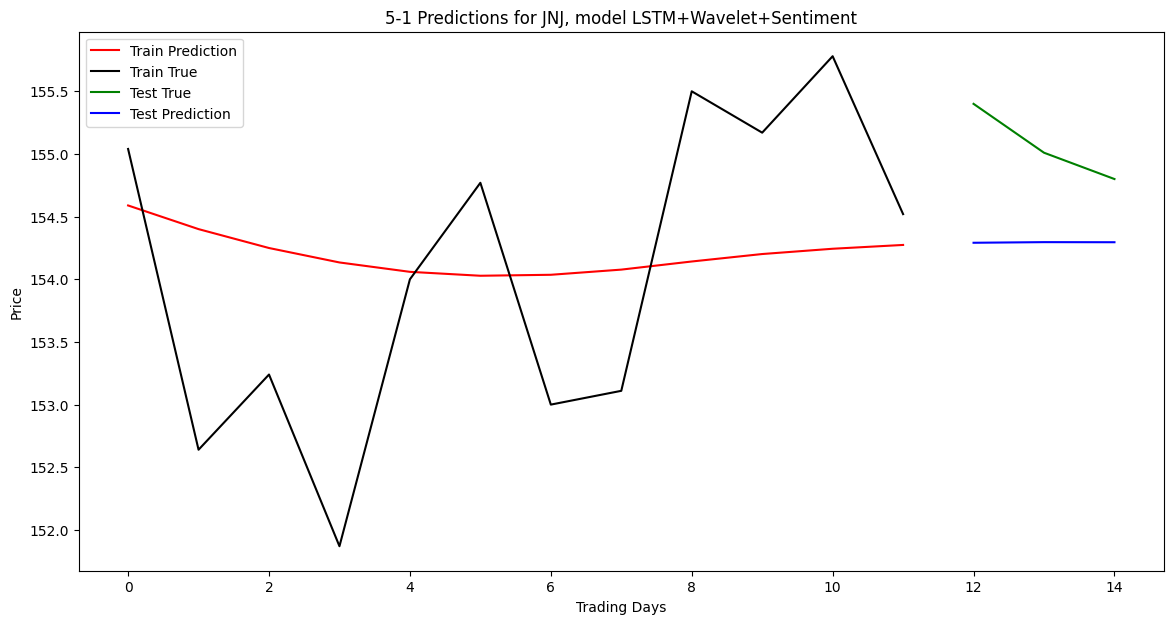

  Ticker                   Model  Train MAE
0    JNJ  LSTM+Wavelet+Sentiment   0.670707


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Flatten, RepeatVector, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests,os
from datetime import datetime, timedelta
# Helper Function to fetch historical stock data
import yfinance as yf
def get_stock_data(ticker, start_date, end_date):
    try:
        # https://medium.com/nerd-for-tech/all-you-need-to-know-about-yfinance-yahoo-finance-library-fa4c6e48f08e
        #data = yf.Ticker(ticker).history(start=start_date, end=end_date)  
        data = yf.download(ticker, start=start_date, end=end_date)
        return data
    except Exception as e:
        return f"Error fetching data: {e}"
    
    
# Sentiment 
def fetch_news_and_sentiment(ticker, start_date, end_date):
    api_url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&apiKey=7e9676fa277d423f8deff9a4894bd717"
    response = requests.get(api_url)
    news_data = response.json()

    headlines = []
    dates = []
    if "articles" in news_data:
        for article in news_data['articles']:
            headlines.append(article['title'])
            # Extract the publication date of the article
            dates.append(article['publishedAt'][:10])  # Extract the YYYY-MM-DD format

    # Perform sentiment analysis using VADER
    analyzer = SentimentIntensityAnalyzer()
    sentiment_data = []
    for headline, date in zip(headlines, dates):
        score = analyzer.polarity_scores(headline)
        sentiment_data.append({'date': date, 'sentiment': score['compound']})  # Store date and compound score

    return sentiment_data

# Function to aggregate daily sentiment scores
def aggregate_daily_sentiment(sentiment_data, start_date, end_date):
    # Convert to DataFrame
    sentiment_df = pd.DataFrame(sentiment_data)
    # print(sentiment_df[:30])
    sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

    # Group by date and calculate the average sentiment for each day
    daily_sentiment = (
        sentiment_df.groupby('date')['sentiment']
        .mean()
        .reindex(pd.date_range(start_date, end_date), fill_value=0)  # Fill missing days with 0 sentiment
    )
    print(daily_sentiment)
    return daily_sentiment
# Data Preprocessing Function
def preprocess_data(df, ticker, start_date, end_date, wavelet_transform=False, sentiment=False, seq_length=5):
    # Normalize Close prices
    scaler_close = MinMaxScaler(feature_range=(0, 1))
    df['Close_scaled'] = scaler_close.fit_transform(df['Close'].values.reshape(-1, 1))

    # Optionally apply Wavelet Transform to Close prices
    if wavelet_transform:
        wavelet = pywt.Wavelet('db6')
        def wavelet_transform(data, lvl=8):
            coeff = pywt.wavedec(data, wavelet, mode='symmetric', level=lvl)
            return coeff
        def inverse_wavelet_transform(coeff):
            for i in range(3):
                coeff[-(i + 1)] = np.zeros_like(coeff[-(i + 1)])
            return pywt.waverec(coeff, wavelet, mode='symmetric')
        
        close_prices = df['Close'].values
        wavelet_coeff = wavelet_transform(close_prices)
        reconstructed_close = inverse_wavelet_transform(wavelet_coeff)
        
        # Adjust the reconstructed data length to match the original DataFrame
        # reconstructed_close = np.pad(reconstructed_close, (0, len(df) - len(reconstructed_close)), mode='edge')
        reconstructed_close = np.pad(reconstructed_close, (0, max(0, len(df) - len(reconstructed_close))), mode='edge')

        df['Close_scaled'] = scaler_close.fit_transform(reconstructed_close.reshape(-1, 1))

    # Optionally include Sentiment data
    if sentiment:
        sentiment_data = fetch_news_and_sentiment(ticker, start_date, end_date)
        sentiment_df = pd.DataFrame(sentiment_data)
        print(sentiment_df)
        # Group by date and average sentiment
        sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])  # Ensure 'date' is in datetime format
        daily_sentiment_scores = sentiment_df.groupby('date', as_index=False)['sentiment'].mean()
        
        df.index = pd.to_datetime(df.index)  # Convert stock_data index to datetime
        daily_sentiment_scores.index = pd.to_datetime(daily_sentiment_scores.index)  # Convert daily_sentiment index to datetime

        # Replace the "Sentiment" column in stock_data with values from daily_sentiment
        df['Sentiment'] = df.index.map(daily_sentiment_scores.get)

        # Fill any missing sentiment values with 0
        df['Sentiment'].fillna(0, inplace=True)

        scaler_sentiment = MinMaxScaler(feature_range=(0, 1))
        df['Sentiment_scaled'] = scaler_sentiment.fit_transform(df['Sentiment'].values.reshape(-1, 1))
        features = df[['Close_scaled', 'Sentiment_scaled']].values
    else:
        features = df[['Close_scaled']].values

    # Create sequences for LSTM
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i + seq_length])
        y.append(features[i + seq_length, 0])  # Target is the next Close value
    return np.array(X), np.array(y), scaler_close

# Build LSTM Model
# def build_lstm_model(input_shape, return_sequences=False):
#     model = Sequential([
#         Bidirectional(LSTM(units=256, return_sequences=True, input_shape=input_shape)),
#         Dropout(0.3),
#         Bidirectional(LSTM(units=128, return_sequences=return_sequences)),
#         Dropout(0.3),
#         RepeatVector(1),
#         Dense(units=64, activation='relu'),
#         Dense(units=32),
#         Flatten(),
#         Dense(units=1)
#     ])
#     model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
#     return model
def build_lstm_model(input_shape, output_len, return_sequences=False):

    model = Sequential([
        # LSTM(200, return_sequences=False, input_shape=input_shape),  # LSTM layer
        # LeakyReLU(),  # Apply Leaky ReLU to LSTM outputs
        LSTM(180, activation='relu', return_sequences=False),  # LSTM layer
        Dense(180),
        LeakyReLU(),
        Dense(360),
        LeakyReLU(),
        Dense(360),
        LeakyReLU(),
        Dense(output_len)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Train Model and Get Predictions
def train_and_predict(X_train, y_train, X_test, y_test, model, scaler_close):
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Inverse transform predictions and true values
    train_predictions = scaler_close.inverse_transform(train_predictions)
    test_predictions = scaler_close.inverse_transform(test_predictions)
    y_train = scaler_close.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler_close.inverse_transform(y_test.reshape(-1, 1))

    return train_predictions, test_predictions, y_train, y_test

# Calculate Metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)/y_true * 100
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Plot Results
def plot_results(df, seq_length, pred_len, split, y_train, train_predictions, y_test, test_predictions, ticker, model_type):
    plt.figure(figsize=(14, 7))
    index = range(len(df.index[seq_length::]))
    plt.plot(index[:split], train_predictions, label='Train Prediction', color='red')
    plt.plot(index[:split], y_train, label='Train True', color='black')
    plt.plot(index[split:], y_test, label='Test True', color='green')
    plt.plot(index[split:], test_predictions, label='Test Prediction', color='blue')
    plt.legend(loc = "upper left")
    plt.title(f"{seq_length}-{pred_len} Predictions for {ticker}, model {model_type}")
    plt.xlabel("Trading Days")
    plt.ylabel("Price")
    directory = f"{seq_length}-{pred_len}/lstm_wave_sent/{ticker}"
    os.makedirs(directory, exist_ok=True)
    plt.savefig(directory)
    plt.show()


# Consolidated Function to Handle Multiple Tickers
def run_models_for_tickers(tickers, models=['LSTM', 'LSTM + Wavelet', 'LSTM + Sentiment', 'LSTM + Wavelet + Sentiment'], metrics=['MAE', 'MSE', 'RMSE', 'R2'], seq_length=5): # '
    results = []
    pred_len = 1
    for ticker in tickers:
        start_date = "2024-11-04"
        end_date = "2024-12-03"
        df = get_stock_data(ticker,start_date,end_date)  # Assume a function to load stock data for each ticker
        print(f"Processing {ticker}...")
        
        for model_type in models:
            # Preprocess data based on model type
            wavelet_transform = 'Wavelet' in model_type
            sentiment = 'Sentiment' in model_type
            X, y, scaler_close = preprocess_data(df, ticker, start_date, end_date, wavelet_transform=wavelet_transform, sentiment=sentiment, seq_length=seq_length)
            
            # Split data into training and testing sets
            split = int(0.8 * len(X))
            X_train, X_test = X[:split], X[split:]
            y_train, y_test = y[:split], y[split:]

            # Build and train model
            model = build_lstm_model(input_shape=(seq_length, X.shape[2]), output_len=pred_len, return_sequences=('Wavelet' in model_type))
            train_predictions, test_predictions, y_train, y_test = train_and_predict(X_train, y_train, X_test, y_test, model, scaler_close)
            
            y_train_true, y_test_true = df['Close'][seq_length:split+seq_length], df['Close'][split+seq_length:]

            metrics_results = calculate_metrics(y_test_true, test_predictions)
            train_metrics_results = calculate_metrics(y_train_true, train_predictions)
            results.append({
                'Ticker': ticker,
                'Model': model_type,
                'Train MAE': np.mean(train_metrics_results[0]),
                # 'Train MSE': train_metrics_results[1],
                # 'Train RMSE': train_metrics_results[2],
                # 'Train R2': train_metrics_results[3],
                # 'Test MAE': metrics_results[0],
                # 'Test MSE': metrics_results[1],
                # 'Test RMSE': metrics_results[2],
                # 'Test R2': metrics_results[3]
            })

            # Plot results
            plot_results(df, seq_length, pred_len, split, y_train_true, train_predictions, y_test_true, test_predictions, ticker, model_type)

    # Create DataFrame to store results
    results_df = pd.DataFrame(results)
    print(results_df)
tickers = ["JNJ"]#["TSLA","NVDA","AMZN","MSFT", "BIPC", "JNJ","WMB","HMC","MSFT", "TM"]
models=['LSTM+Wavelet+Sentiment']#'LSTM', 'CNN', 'RandomForest', 'XGBoost', 'LightGBM', 'LSTM+Wavelet', 'CNN+Wavelet', 'RandomForest+Wavelet', 'XGBoost+Wavelet', 'LightGBM+Wavelet']
# models=['LSTM + Sentiment + Wavelet']
# Example Usage
results_df = run_models_for_tickers(tickers, models, metrics=['MAE', 'MSE', 'RMSE', 'R2'])


In [2]:
results_df[0]

TypeError: 'NoneType' object is not subscriptable